In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

curr = Path.cwd() 
path = curr.parent.parent
file = str(path)
file+="/data_cleanup/cleaned_data.csv"
print(file)

/home/matijak/Documents/programiranje/lumen/data_cleanup/cleaned_data.csv


In [11]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,broj_nocenja,ukupno_placeno
0,0,0,2015-07-01,2015-01-21,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,1.0,100.000000
1,1,0,2015-07-01,2015-06-10,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,1.0,100.000000
2,2,0,2015-07-01,2015-05-13,2015-07-02,NaN,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1.0,64.991345
3,3,0,2015-07-01,2014-05-30,2015-07-02,NaN,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1.0,74.368897
4,4,0,2015-07-01,2014-07-06,2015-07-03,NaN,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2.0,261.946557


In [14]:
df = df[df["status_rezervacije"] == "Check-Out"]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74414 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     74414 non-null  int64  
 1   hotel_id                       74414 non-null  int64  
 2   datum_dolaska                  74414 non-null  object 
 3   datum_kreiranja_rezervacije    74414 non-null  object 
 4   datum_odjave                   74414 non-null  object 
 5   datum_otkazivanja_rezervacije  0 non-null      object 
 6   broj_odraslih_gostiju          74414 non-null  int64  
 7   broj_djece_gostiju             74414 non-null  float64
 8   zemlja_gosta                   74414 non-null  object 
 9   kanal_prodaje_id               74414 non-null  int64  
 10  tip_sobe_id                    74414 non-null  int64  
 11  cijena_nocenja                 74414 non-null  float64
 12  status_rezervacije             74414 non-null  obje

In [20]:
df['datum_dolaska'] = pd.to_datetime(df['datum_dolaska'])
df['datum_kreiranja_rezervacije'] = pd.to_datetime(df['datum_kreiranja_rezervacije'])
df['datum_otkazivanja_rezervacije'] = pd.to_datetime(df['datum_otkazivanja_rezervacije'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74414 entries, 0 to 93961
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     74414 non-null  int64         
 1   hotel_id                       74414 non-null  int64         
 2   datum_dolaska                  74414 non-null  datetime64[ns]
 3   datum_kreiranja_rezervacije    74414 non-null  datetime64[ns]
 4   datum_odjave                   74414 non-null  object        
 5   datum_otkazivanja_rezervacije  0 non-null      datetime64[ns]
 6   broj_odraslih_gostiju          74414 non-null  int64         
 7   broj_djece_gostiju             74414 non-null  float64       
 8   zemlja_gosta                   74414 non-null  object        
 9   kanal_prodaje_id               74414 non-null  int64         
 10  tip_sobe_id                    74414 non-null  int64         
 11  cijena_nocenja      

In [21]:
occupancy = df[(df['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

,datum,broj_gostiju
0,2015-01-01,10.0
1,2015-01-02,16.0
2,2015-01-03,19.0
3,2015-01-04,24.0
4,2015-01-05,25.0


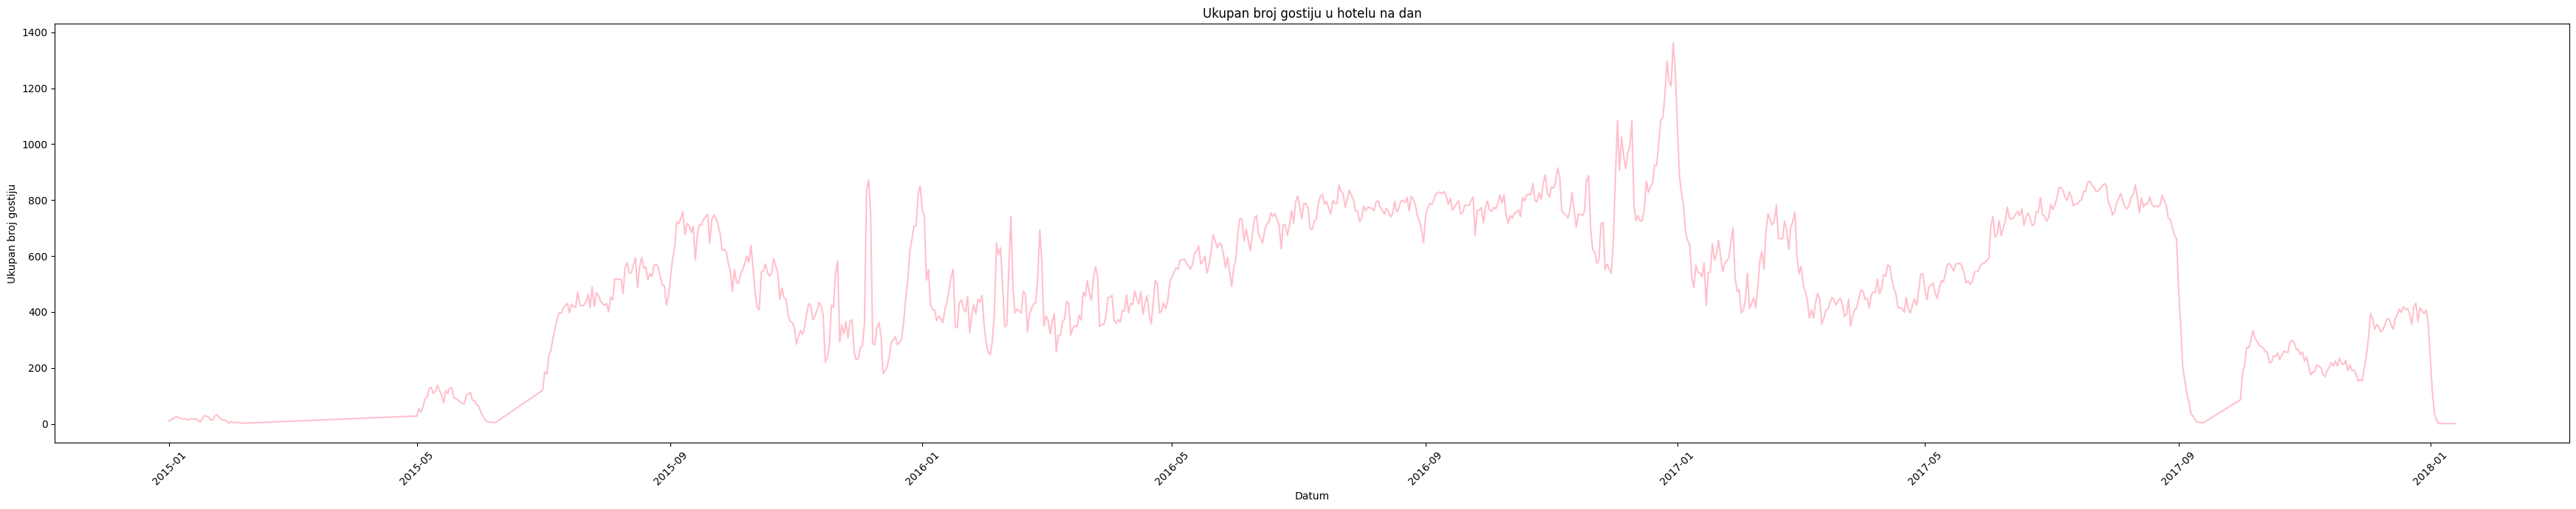

In [25]:
plt.figure(figsize=(35, 7))  # Prilagodite veličinu prema potrebi
plt.plot(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

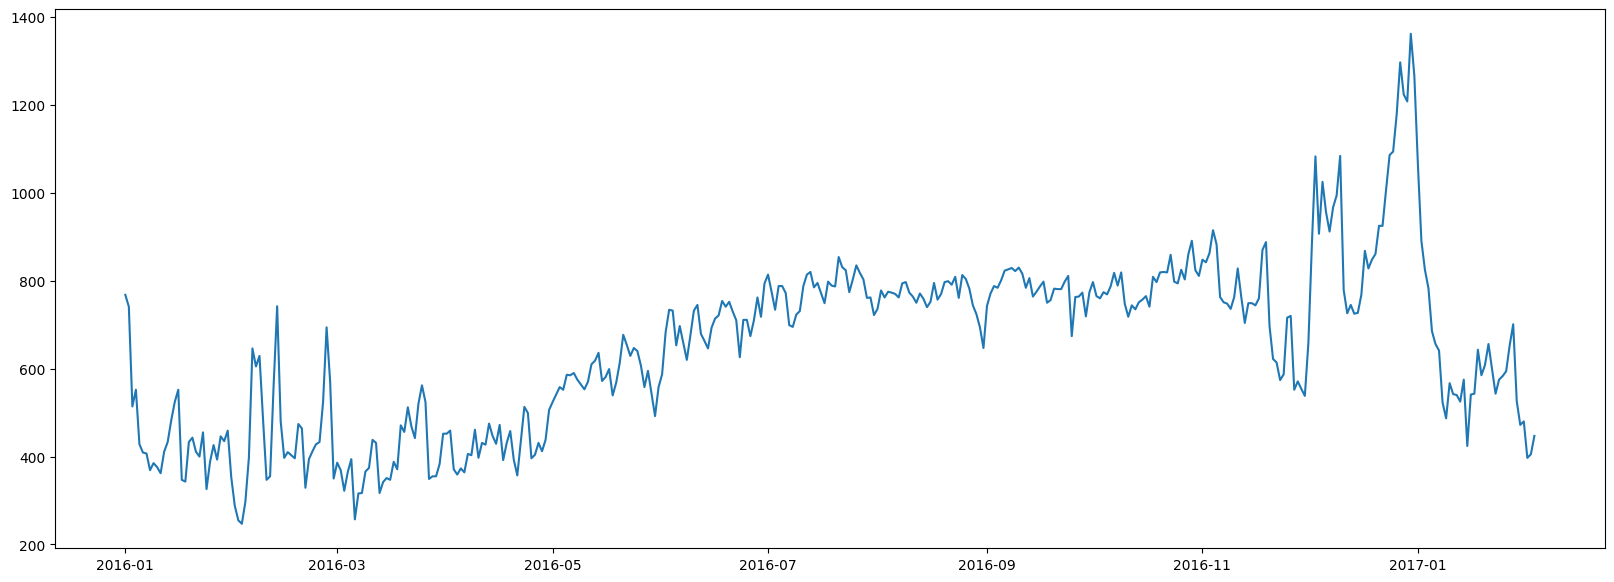

In [32]:
train = final_df[(final_df["datum"] >= datetime(2016,1,1)) &  (final_df["datum"] <= datetime(2017,2,3))]
train.head()
plt.figure(figsize=(20, 7))
plt.plot(train["datum"],train["broj_gostiju"])

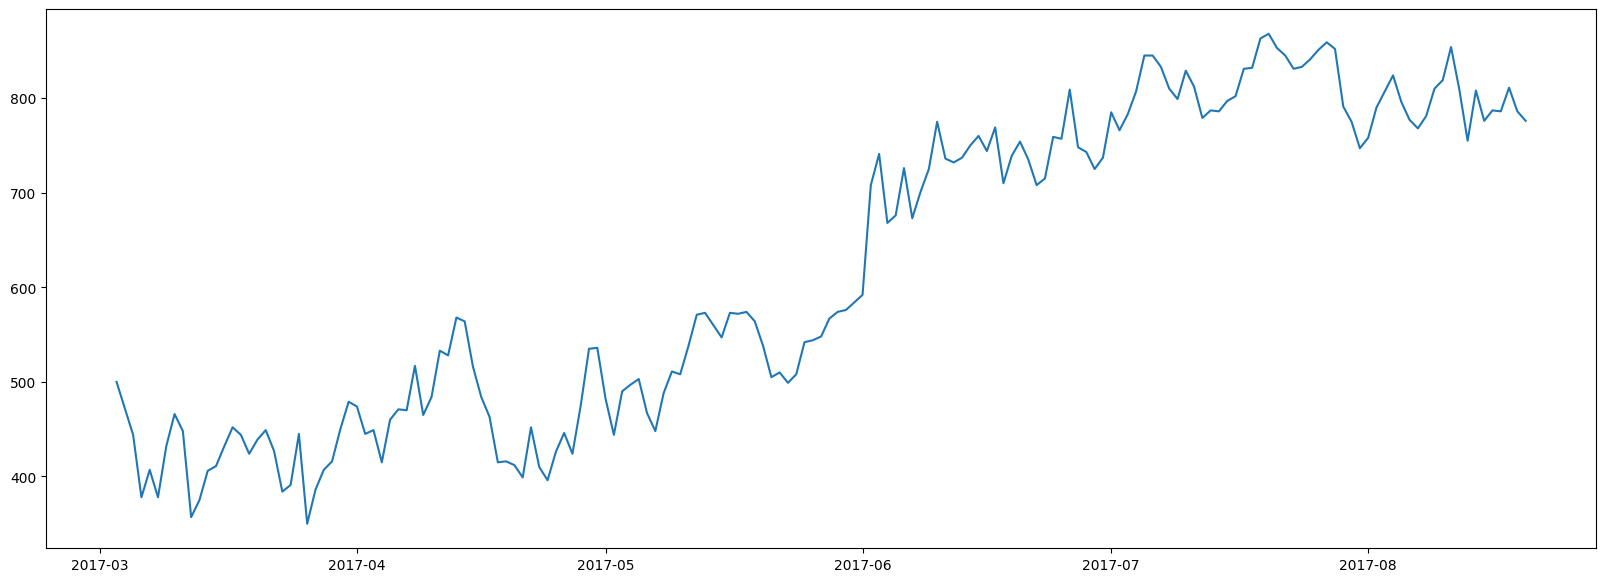

In [36]:
test = final_df[(final_df["datum"] >= datetime(2017,3,3)) &  (final_df["datum"] <= datetime(2017,8,20))]
test.head()
plt.figure(figsize=(20, 7))
plt.plot(test["datum"],test["broj_gostiju"])